#### Carregando as importações

In [1]:
import import_ipynb
from preprocessing_smote import *
from imports.imports_common_models_DL import *
from imports.imports_common_metrics import *
from tensorflow.keras.utils import plot_model

importing Jupyter notebook from preprocessing_smote.ipynb
importing Jupyter notebook from preprocessing.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_preprocessing.ipynb
importing Jupyter notebook from load_dataset.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common.ipynb
X:  6400
X_train:  4480
X_test:  1280
X_val:  640
(array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
       'Very_Mild_Demented'], dtype='<U18'), array([ 627,   45, 2240, 1568], dtype=int64))
(array([0, 1, 2, 3], dtype=int64), array([ 627,   45, 2240, 1568], dtype=int64))
(array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
       'Very_Mild_Demented'], dtype='<U18'), array([179,  13, 640, 448], dtype=int64))
(array([0, 1, 2, 3]), array([179,  13, 640, 448], dtype=int64))
(array([0, 1, 2, 3]), array([179,  13, 640, 448], dtype=

c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_metrics.ipynb


In [2]:
Modelos =  []
Loss = []
Acuracia =  []
Precisao = []
Revocacao =  []
F1_score =  []

In [3]:
# Define a arquitetura da CNN
model_1 = Sequential([
    Conv2D(25, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [4]:
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

# Treina o modelo
history_model_1 = model_1.fit(X_train, y_train_categorical, epochs = EPOCHS, validation_data = dataset_validation_categorical, callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 47s 318ms/step - loss: 0.9981 - accuracy: 0.5250 - precision: 0.6032 - recall: 0.3464 - f1_score: 0.1961 - val_loss: 0.8878 - val_accuracy: 0.5969 - val_precision: 0.7016 - val_recall: 0.4187 - val_f1_score: 0.2668
Epoch 2/30
140/140 [==============================] - 47s 333ms/step - loss: 0.8021 - accuracy: 0.6400 - precision: 0.7298 - recall: 0.5004 - f1_score: 0.3468 - val_loss: 0.7239 - val_accuracy: 0.6453 - val_precision: 0.7213 - val_recall: 0.5703 - val_f1_score: 0.3580
Epoch 3/30
140/140 [==============================] - 45s 319ms/step - loss: 0.5109 - accuracy: 0.7940 - precision: 0.8316 - recall: 0.7475 - f1_score: 0.5899 - val_loss: 0.4878 - val_accuracy: 0.8203 - val_precision: 0.8414 - val_recall: 0.7875 - val_f1_score: 0.8198
Epoch 4/30
140/140 [==============================] - 53s 378ms/step - loss: 0.2392 - accuracy: 0.9109 - precision: 0.9203 - recall: 0.8991 - f1_score: 0.9060 - val_loss: 0.2711 - val_accuracy:

In [5]:
# Avaliar o modelo no conjunto de teste
result_model_1 = model_1.evaluate(X_test, y_test_categorical)
print('Test:', result_model_1)

40/40 [==============================] - 4s 93ms/step - loss: 0.0728 - accuracy: 0.9781 - precision: 0.9781 - recall: 0.9781 - f1_score: 0.9798
Test: [0.07275411486625671, 0.9781249761581421, 0.9781249761581421, 0.9781249761581421, 0.9797576665878296]


In [6]:
loss, accuracy, precision, recall, f1_score  = result_model_1
Modelos.append('Modelo01')
Acuracia.append(accuracy)
Loss.append(loss)
Precisao.append(precision)
Revocacao.append(recall)
F1_score.append(f1_score)

In [7]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 25)      250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

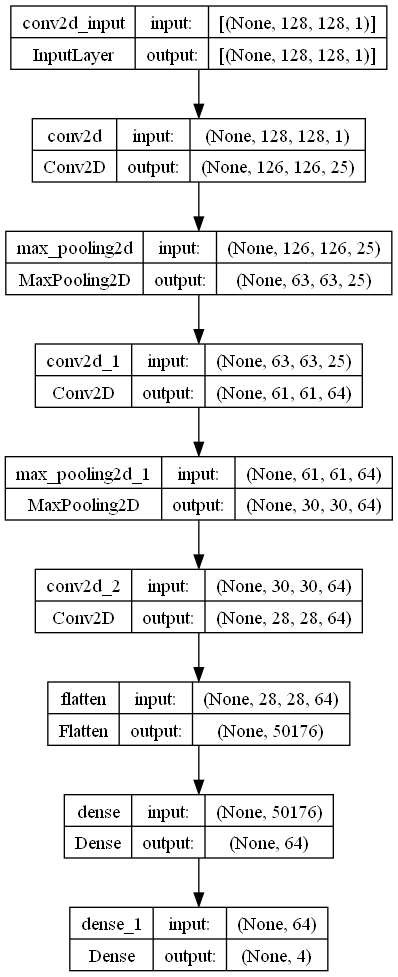

In [8]:
plot_model(model_1, to_file = './images/arquitetura01_smote.png', show_shapes = True)

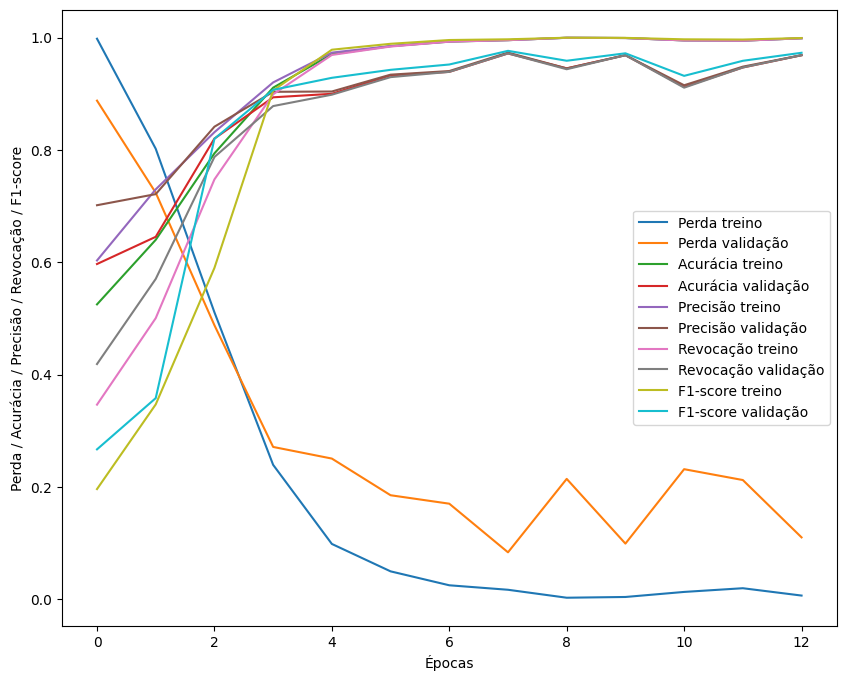

In [9]:
# Plota os gráficos de perda e acurácia
plt.figure(figsize = (10, 8))
plt.plot(history_model_1.history['loss'], label='Perda treino')
plt.plot(history_model_1.history['val_loss'], label='Perda validação')
plt.plot(history_model_1.history['accuracy'], label='Acurácia treino')
plt.plot(history_model_1.history['val_accuracy'], label='Acurácia validação')
plt.plot(history_model_1.history['precision'], label='Precisão treino')
plt.plot(history_model_1.history['val_precision'], label='Precisão validação')
plt.plot(history_model_1.history['recall'], label='Revocação treino')
plt.plot(history_model_1.history['val_recall'], label='Revocação validação')
plt.plot(history_model_1.history['f1_score'], label='F1-score treino')
plt.plot(history_model_1.history['val_f1_score'], label='F1-score validação')
plt.xlabel('Épocas')
plt.ylabel('Perda / Acurácia / Precisão / Revocação / F1-score')
plt.legend()
plt.savefig('images\modelo01_grafico_smote.png', format='png')
plt.show()

In [10]:
# Define a arquitetura da CNN
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [11]:
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

# Treina o modelo
history_model_2 = model_2.fit(X_train, y_train_categorical, epochs = EPOCHS, validation_data = dataset_validation_categorical, callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 52s 354ms/step - loss: 1.0055 - accuracy: 0.5212 - precision: 0.7183 - recall: 0.4861 - f1_score: 0.4571 - val_loss: 1.1129 - val_accuracy: 0.5031 - val_precision: 0.5300 - val_recall: 0.4828 - val_f1_score: 0.1762
Epoch 2/30
140/140 [==============================] - 41s 296ms/step - loss: 0.8222 - accuracy: 0.6301 - precision: 0.6935 - recall: 0.5172 - f1_score: 0.3736 - val_loss: 0.8182 - val_accuracy: 0.6469 - val_precision: 0.6899 - val_recall: 0.5875 - val_f1_score: 0.3508
Epoch 3/30
140/140 [==============================] - 41s 296ms/step - loss: 0.5421 - accuracy: 0.7804 - precision: 0.8152 - recall: 0.7297 - f1_score: 0.5644 - val_loss: 0.5443 - val_accuracy: 0.7625 - val_precision: 0.7966 - val_recall: 0.7219 - val_f1_score: 0.6381
Epoch 4/30
140/140 [==============================] - 42s 298ms/step - loss: 0.2921 - accuracy: 0.8917 - precision: 0.9036 - recall: 0.8788 - f1_score: 0.8577 - val_loss: 0.4617 - val_accuracy:

In [12]:
# Avaliar o modelo no conjunto de teste
result_model_2 = model_2.evaluate(X_test, y_test_categorical)
print('Test:', result_model_2)

40/40 [==============================] - 3s 80ms/step - loss: 0.1343 - accuracy: 0.9688 - precision: 0.9688 - recall: 0.9688 - f1_score: 0.9718
Test: [0.13431887328624725, 0.96875, 0.96875, 0.96875, 0.971802294254303]


In [13]:
loss, accuracy, precision, recall, f1_score  = result_model_2
Modelos.append('Modelo02')
Acuracia.append(accuracy)
Loss.append(loss)
Precisao.append(precision)
Revocacao.append(recall)
F1_score.append(f1_score)

In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)            

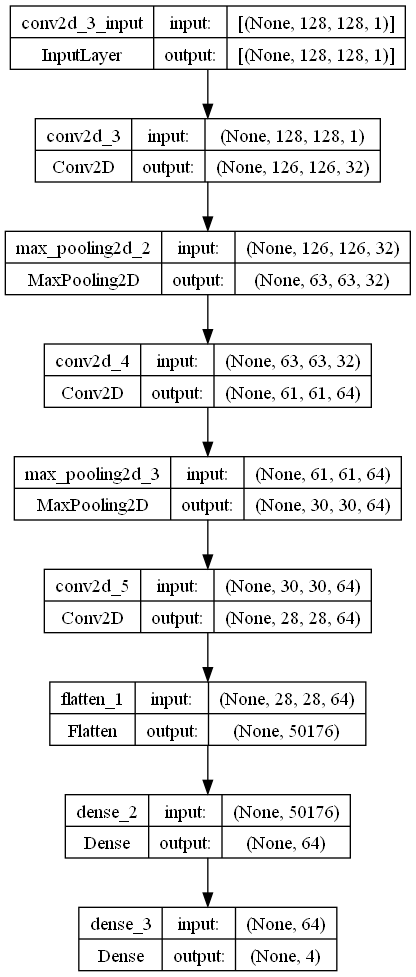

In [15]:
plot_model(model_2, to_file = './images/arquitetura02_smote.png', show_shapes = True)

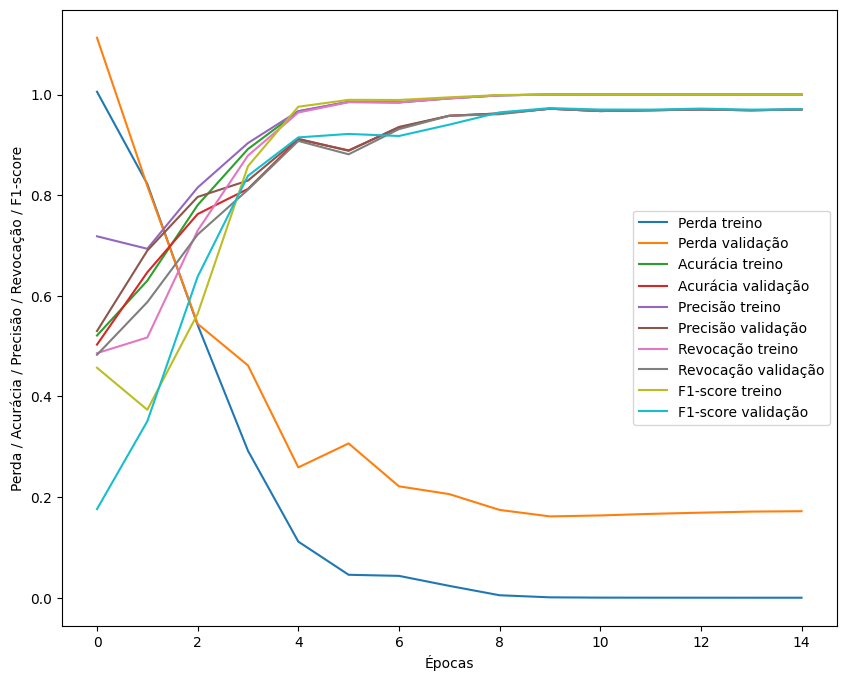

In [16]:
# Plota os gráficos de perda e acurácia
plt.figure(figsize = (10, 8))
plt.plot(history_model_2.history['loss'], label='Perda treino')
plt.plot(history_model_2.history['val_loss'], label='Perda validação')
plt.plot(history_model_2.history['accuracy'], label='Acurácia treino')
plt.plot(history_model_2.history['val_accuracy'], label='Acurácia validação')
plt.plot(history_model_2.history['precision'], label='Precisão treino')
plt.plot(history_model_2.history['val_precision'], label='Precisão validação')
plt.plot(history_model_2.history['recall'], label='Revocação treino')
plt.plot(history_model_2.history['val_recall'], label='Revocação validação')
plt.plot(history_model_2.history['f1_score'], label='F1-score treino')
plt.plot(history_model_2.history['val_f1_score'], label='F1-score validação')
plt.xlabel('Épocas')
plt.ylabel('Perda / Acurácia / Precisão / Revocação / F1-score')
plt.legend()
plt.savefig('images\modelo02_grafico_smote.png', format='png')
plt.show()

In [17]:
# Define a arquitetura da CNN
model_3 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (2,2), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='softmax')
])

In [18]:
model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

# Treina o modelo
history_model_3 = model_3.fit(X_train, y_train_categorical, epochs = EPOCHS, validation_data = dataset_validation_categorical, callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 54s 377ms/step - loss: 1.0296 - accuracy: 0.4926 - precision: 0.7135 - recall: 0.4436 - f1_score: 0.4313 - val_loss: 0.9671 - val_accuracy: 0.5516 - val_precision: 0.6996 - val_recall: 0.2875 - val_f1_score: 0.1578
Epoch 2/30
140/140 [==============================] - 54s 383ms/step - loss: 0.9117 - accuracy: 0.5676 - precision: 0.6669 - recall: 0.3951 - f1_score: 0.2585 - val_loss: 0.8531 - val_accuracy: 0.5859 - val_precision: 0.6904 - val_recall: 0.4250 - val_f1_score: 0.2119
Epoch 3/30
140/140 [==============================] - 57s 407ms/step - loss: 0.7747 - accuracy: 0.6402 - precision: 0.7153 - recall: 0.5176 - f1_score: 0.3928 - val_loss: 0.7364 - val_accuracy: 0.6516 - val_precision: 0.7157 - val_recall: 0.5625 - val_f1_score: 0.4589
Epoch 4/30
140/140 [==============================] - 57s 405ms/step - loss: 0.5744 - accuracy: 0.7578 - precision: 0.7882 - recall: 0.7109 - f1_score: 0.6122 - val_loss: 0.5848 - val_accuracy:

In [19]:
# Avaliar o modelo no conjunto de teste
result_model_3 = model_3.evaluate(X_test, y_test_categorical)
print('Test:', result_model_3)

40/40 [==============================] - 4s 98ms/step - loss: 0.1054 - accuracy: 0.9688 - precision: 0.9702 - recall: 0.9672 - f1_score: 0.9720
Test: [0.10539108514785767, 0.96875, 0.9702194333076477, 0.9671875238418579, 0.9720284938812256]


In [20]:
loss, accuracy, precision, recall, f1_score  = result_model_3
Modelos.append('Modelo03')
Acuracia.append(accuracy)
Loss.append(loss)
Precisao.append(precision)
Revocacao.append(recall)
F1_score.append(f1_score)

In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 32)        4128      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)      

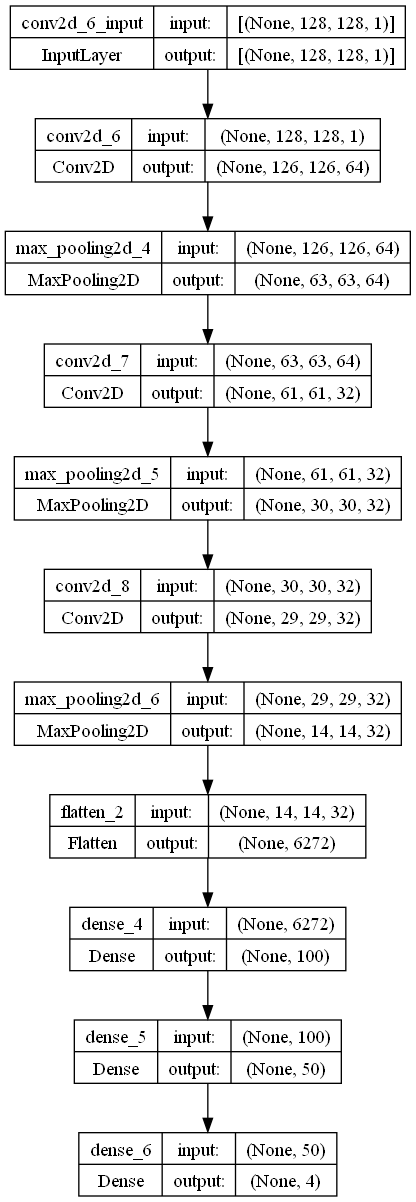

In [22]:
plot_model(model_3, to_file = './images/arquitetura03_smote.png', show_shapes = True)

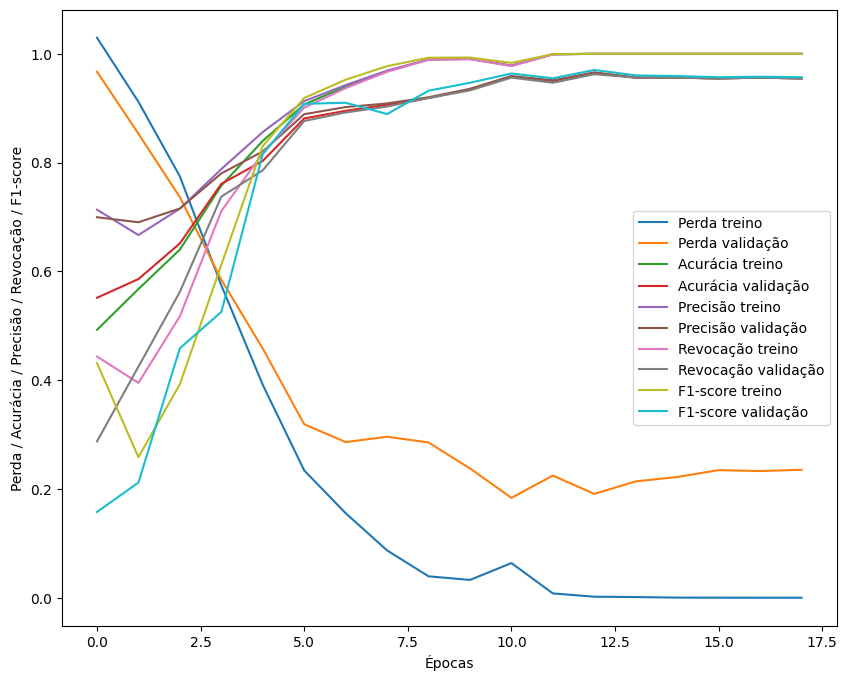

In [23]:
# Plota os gráficos de perda e acurácia
plt.figure(figsize = (10, 8))
plt.plot(history_model_3.history['loss'], label='Perda treino')
plt.plot(history_model_3.history['val_loss'], label='Perda validação')
plt.plot(history_model_3.history['accuracy'], label='Acurácia treino')
plt.plot(history_model_3.history['val_accuracy'], label='Acurácia validação')
plt.plot(history_model_3.history['precision'], label='Precisão treino')
plt.plot(history_model_3.history['val_precision'], label='Precisão validação')
plt.plot(history_model_3.history['recall'], label='Revocação treino')
plt.plot(history_model_3.history['val_recall'], label='Revocação validação')
plt.plot(history_model_3.history['f1_score'], label='F1-score treino')
plt.plot(history_model_3.history['val_f1_score'], label='F1-score validação')
plt.xlabel('Épocas')
plt.ylabel('Perda / Acurácia / Precisão / Revocação / F1-score')
plt.legend()
plt.savefig('images\modelo03_grafico_smote.png', format='png')
plt.show()

In [24]:
model_4 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [25]:
model_4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

# Treina o modelo
history_model_4 = model_4.fit(X_train, y_train_categorical, epochs = EPOCHS, validation_data = dataset_validation_categorical, callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 81s 569ms/step - loss: 1.0348 - accuracy: 0.5074 - precision: 0.7230 - recall: 0.4455 - f1_score: 0.4426 - val_loss: 0.9078 - val_accuracy: 0.6031 - val_precision: 0.7581 - val_recall: 0.3281 - val_f1_score: 0.1792
Epoch 2/30
140/140 [==============================] - 62s 444ms/step - loss: 0.8934 - accuracy: 0.5859 - precision: 0.6906 - recall: 0.3922 - f1_score: 0.2576 - val_loss: 0.8234 - val_accuracy: 0.6172 - val_precision: 0.7437 - val_recall: 0.4172 - val_f1_score: 0.2616
Epoch 3/30
140/140 [==============================] - 64s 457ms/step - loss: 0.8028 - accuracy: 0.6366 - precision: 0.7122 - recall: 0.4998 - f1_score: 0.3751 - val_loss: 0.7355 - val_accuracy: 0.6609 - val_precision: 0.7251 - val_recall: 0.5813 - val_f1_score: 0.3917
Epoch 4/30
140/140 [==============================] - 62s 442ms/step - loss: 0.6485 - accuracy: 0.7163 - precision: 0.7679 - recall: 0.6433 - f1_score: 0.5077 - val_loss: 0.6632 - val_accuracy:

In [26]:
# Avaliar o modelo no conjunto de teste
result_model_4 = model_4.evaluate(X_test, y_test_categorical)
print('Test:', result_model_4)

40/40 [==============================] - 4s 108ms/step - loss: 0.0803 - accuracy: 0.9750 - precision: 0.9750 - recall: 0.9750 - f1_score: 0.9753
Test: [0.08032314479351044, 0.9750000238418579, 0.9750000238418579, 0.9750000238418579, 0.9753262996673584]


In [27]:
loss, accuracy, precision, recall, f1_score  = result_model_4
Modelos.append('Modelo04')
Acuracia.append(accuracy)
Loss.append(loss)
Precisao.append(precision)
Revocacao.append(recall)
F1_score.append(f1_score)

In [28]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 128)     

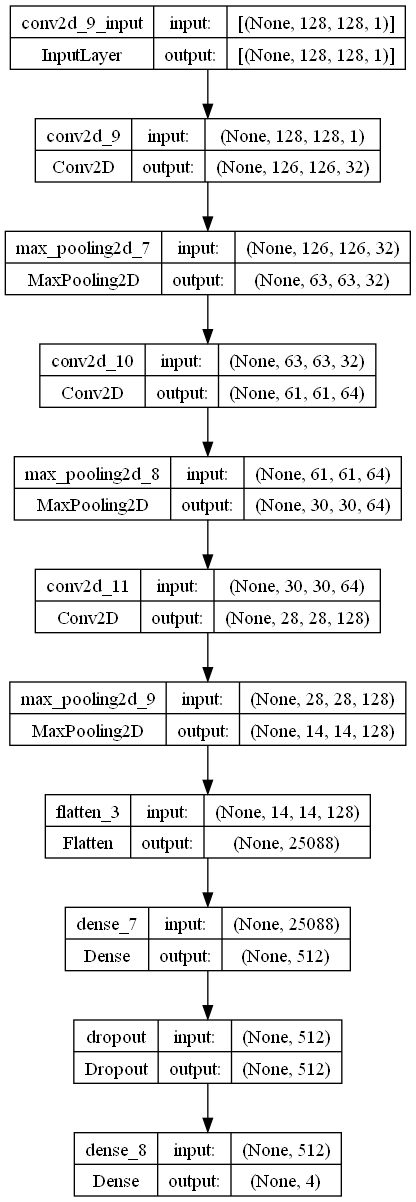

In [29]:
plot_model(model_4, to_file = './images/arquitetura04_smote.png', show_shapes = True)

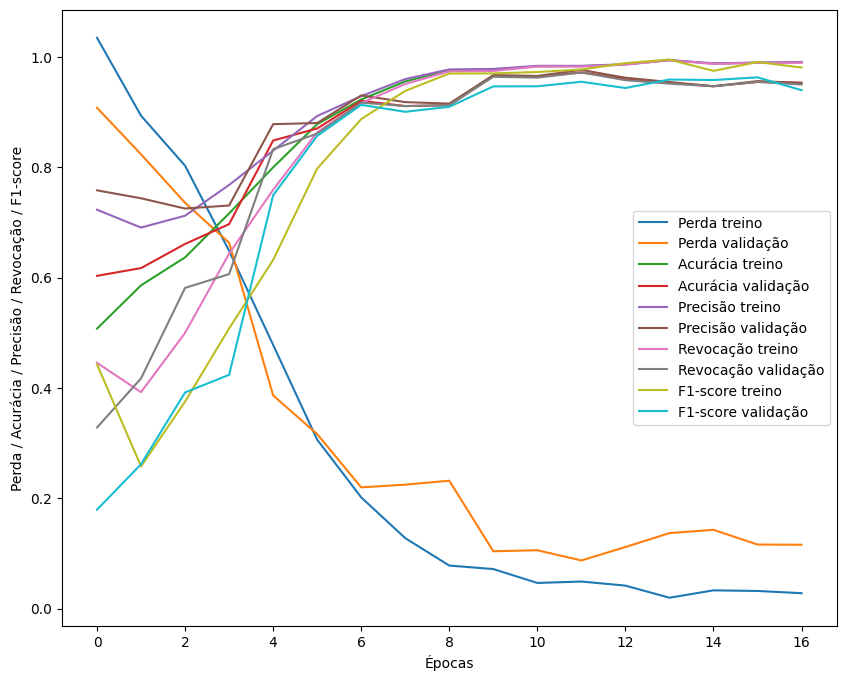

In [30]:
# Plota os gráficos de perda e acurácia
plt.figure(figsize = (10, 8))
plt.plot(history_model_4.history['loss'], label='Perda treino')
plt.plot(history_model_4.history['val_loss'], label='Perda validação')
plt.plot(history_model_4.history['accuracy'], label='Acurácia treino')
plt.plot(history_model_4.history['val_accuracy'], label='Acurácia validação')
plt.plot(history_model_4.history['precision'], label='Precisão treino')
plt.plot(history_model_4.history['val_precision'], label='Precisão validação')
plt.plot(history_model_4.history['recall'], label='Revocação treino')
plt.plot(history_model_4.history['val_recall'], label='Revocação validação')
plt.plot(history_model_4.history['f1_score'], label='F1-score treino')
plt.plot(history_model_4.history['val_f1_score'], label='F1-score validação')
plt.xlabel('Épocas')
plt.ylabel('Perda / Acurácia / Precisão / Revocação / F1-score')
plt.legend()
plt.savefig('images\modelo04_grafico_smote.png', format='png')
plt.show()